Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> MLP, Regresión Logística y Redes Bayesianas</h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Primer Semestre 2024<br>    
        Fecha de entrega: 17 de mayo
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

A continuación se encuentran las librerías necesarias para elaborar la tarea. Recuerda ejecutar la celda antes de comenzar.

In [1]:
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from typing import List
import seaborn as sns
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

## Parte 1: Carga y Preprocesamiento de Datos (10 Pts.)

Para esta tarea, deberás utilizar el dataset [Mushroom Dataset (Binary Classification)](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data) que se puede encontrar en Kaggle.

### 1.1 Carga de Datos

Descarga el dataset y cárgalo a continuación en un dataframe de pandas.

In [2]:
df = pd.read_csv('mushroom.csv')  

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df['season'].unique()

array([1.80427271, 0.94319455, 0.88845029, 0.02737213])

### 1.2 Descripción del dataset (2 Pts.)

A continuación, presenta una descripción detallada del dataset. Se espera que investigues los datos, y expliques en que consisten las columnas. Explica también cuál es la variable objetivo.

--------------------------------------------------------------------------------------------------------------------------

In [5]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

La clase objetivo consiste en la variable 'class' que es binaria, donde 0 representa que el hongo es comestible y 1 que es venenoso.

* **cap-diameter:** Diametro de la cabeza de hongo en cm (numérico). 
* **cap-shape:** Forma de la cabeza de hongo (nominal). (0: Campana , 1: Cónico , 2: Convexo ,3: Plano , 4: Hundido , 5: Esférico , 6: Otro) 
* **gill-attachment:** Forma en que se une la cabeza con su lamela (láminas/ laminillas/ agallas) (nominal). (0: Adnate , 1: Adnexed , 2: Decurrent , 3: Free , 4: Sinuate , 5: Pores , 6: None) 
* **gill-color:** Color de lamela (nominal). (0: cafe , ... , 10: Naranjo , 11: Negro)
* **stem-height:**  Altura del tallo en cm (float).
* **stem-width:** Ancho del tallo en mm (numérico).
* **stem-color:**  Color de tallo (nominal). (0: cafe , ... , 10: Naranjo , 11: Negro , 12: None)
* **season:** Estación del año (nominal). (0.03: Primavera , 0.89: Verano , 0.94: Otoño , 1.8: Invierno)

Datos obtenidos de [kaggle](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data) y dataset [original](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset).

--------------------------------------------------------------------------------------------------------------------------

### 1.3 Limpieza del dataset y Normalización (3 Pts.)

Como podrás notar, el dataset entregado se encuentra limpio de antemano. En particular, se usaron las siguientes técnicas de limpieza:
- Modal imputation
- one-hot encoding
- z-score normalization
- feature selection

Para este item debes:
1. Explicar cada una de las técnicas de limpieza que se utilizaron (con palabras).
2. Revisar en código si existen valores nulos, si hay columnas poco relevantes y si existe desbalance de clases.

--------------------------------------------------------------------------------------------------------------------------

* **Modal inputation:** Consiste en reconstruír datos nulos usando Machine Learning a partir de los datos completos. [Referencia](https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation)
* **One-hot encoding:**  A cada variable categórica, se le asigna un valor númerico, usualmente 0, 1, 2 ... [Referencia](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/one-hot-encoding)
* **z score normalization:** Normalizar algunas columnas del dataset, usualmente para quedar con $\mu = 0$ y $\sigma = 1$.
* **Feature selection:** Seleccionar las variables más importantes en el dataset, dejando afuera variables irrelevantes o rebundantes.

In [6]:
df.isnull().values.any()

False

No hay valores nulos.

In [7]:
for cat in df.columns:
    print(f'La variable {cat} tiene varianza {df[cat].var()}') #Preguntar

La variable cap-diameter tiene varianza 129516.32308145746
La variable cap-shape tiene varianza 4.667783148603003
La variable gill-attachment tiene varianza 4.967642180295618
La variable gill-color tiene varianza 10.241701492665827
La variable stem-height tiene varianza 0.42376013891565334
La variable stem-width tiene varianza 611611.7059972017
La variable stem-color tiene varianza 10.64115133304629
La variable season tiene varianza 0.09338743976633113
La variable class tiene varianza 0.24758580269960084


En general todas las columnas presentan buena varianza. Quizás la variable más inutil es la variable season, ya que como se observa en [kaggle](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data), entrega básicamente solo 2 clases de separación. Analizando esta misma referencia, es posible ver algunas columnas desvalanceadas como gill-color que la gran mayoria de sus valores se encuentran con 10 u 11. Otro ejemplo es stem-height donde la mayoría de los datos son relativamente pequeños.

----------------------------------

### 1.4 Partición en conjuntos de entrenamiento y prueba (0 Pts.)

Parte los datos en conjuntos de entrenamiento y prueba. Utiliza un 80% de los datos para entrenamiento y un 20% para prueba. Utiliza random_state=42.

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

## Parte 2: Redes Bayesianas (15 Pts)

A continuación debes realizar un análisis de redes bayesianas sobre el dataset, con la finalidad de poder inferir la probabilidad de que un hongo sea venenoso o no, dadas las características que se presentan en el dataset.

### 2.1 Redes Bayesianas: Explicación Teórica (5 Pts.)

Investiga sobre `Redes Bayesianas` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve?
3. ¿Cómo se construye?
4. ¿Qué es un nodo y una arista en una red bayesiana?
5. ¿Qué es un CPD?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

--------------------------------------------------------------------------------------------------------------------------

Las redes bayesianas son modelos probabilísticos que se basan en grafos dirigidos acíclicos. La idea es que dado 2 vértices $u$ y $V$, existe un arco que va de $u$ a $v$ si $v$ depende de alguna manera de $u$. Esto resulta útil en nuestro contexto ya que es una forma gráfica de ver las dependencia de columnas en un dataset, mostrando cuales son más importantes y cuáles depende de cuáles (y cuáles son independientes entre si) para poder hallar relaciones de causalidad. 

La forma de construcción consta de 2 fases. En la primera fase, se genera un grafo no direccional y luego se orientan sus aristas. En la segunda fase, se usa el algoritmo K2 usando la información del dataset. K2 es un algoritmo heurístico que busca la red más probable acorde al dataset.

El algoritmo retorna un grafo dirigido. Cada vértice representa una variable y cada arista de $u$ a $v$ representa que la variable $v$ es dependiente de $u$. Además, cada arista contiene la distribución de probabilidad conjunta (CPD) de ambas variables. Esta es una matríz que representa que tan probable es un resultado de la variable dependiente, dado un valor de la variable independiente.

[Referncia](https://www.sciencedirect.com/topics/mathematics/bayesian-network)
[Referncia](https://pgmpy.org/detailed_notebooks/2.%20Bayesian%20Networks.html)
[Referencia](https://cse.sc.edu/~mgv/papers/ijar_cb.pdf)

--------------------------------------------------------------------------------------------------------------------------

### 2.2 Aprender la estructura de la red bayesiana (3 Pts.)

Utiliza la librería pgmpy en Python para aplicar el algoritmo Hill Climb Search con el criterio de puntuación BIC y encontrar la estructura óptima de una red bayesiana. Puedes guiarte de las actividades vistas en clases.

In [9]:
from pgmpy.estimators import HillClimbSearch
import numpy as np
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianNetwork

hc = HillClimbSearch(train)
best_model = hc.estimate(scoring_method=BicScore(train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('gill-attachment', 'cap-shape'), ('gill-attachment', 'stem-color'), ('gill-attachment', 'season'), ('gill-color', 'gill-attachment'), ('gill-color', 'stem-color'), ('gill-color', 'class'), ('stem-color', 'cap-shape'), ('stem-color', 'season'), ('class', 'gill-attachment'), ('class', 'stem-color'), ('class', 'cap-shape'), ('class', 'season')]


### 2.3 Encontrar la estructura óptima (2 Pts.)

En esta sección, debes entrenar la red bayesiana con los datos de entrenamiento usando la estructura óptima encontrada en la sección anterior. Luego, debes imprimir las probabilidades condicionales de la red bayesiana.

In [10]:
model = BayesianNetwork(best_model.edges())

from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, train)

In [38]:
from pgmpy.factors.discrete.CPD import TabularCPD

def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [39]:
model.fit(train, estimator=BayesianEstimator)
for cpd in model.get_cpds():
    print_full(cpd)

+--------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+-----------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| class              | class(0)              | class(0)               | class(0)               | class(0)               | class(0)               | class(0)              | class(0)              | class(0)               | class(0)              | class(0)              | class(0)              | class(0)               | class(1)               | class(1)              | class(1)               |

### 2.4 Inferencia sobre los datos (5 pts)

Finalmente, debes realizar inferencia sobre la red bayesiana. Para esto, se te pide que calcules la probabilidad de que los siguientes hongos sean venenosos o no, dadas sus características:

- Hongo 1: 'gill-color': 7, 'stem-color': 3, 'cap-shape': 1
- Hongo 2: 'stem-color': 2, 'cap-shape': 3
- Hongo 3: 'gill-attachment': 2, 'gill-color': 3

In [35]:
hongo_1_ven = {'gill-color': 7, 'stem-color': 3, 'cap-shape': 1, 'class': 1}
hongo_1_sano = {'gill-color': 7, 'stem-color': 3, 'cap-shape': 1, 'class': 0}
hongo_2_ven = {'cap-shape': 3, 'stem-color': 2, 'class': 1}
hongo_2_sano = {'cap-shape': 3, 'stem-color': 2, 'class': 0}
hongo_3_ven = {'gill-color': 3, 'gill-attachment': 2, 'class': 1}
hongo_3_sano = {'gill-color': 3, 'gill-attachment': 2, 'class': 0}

In [36]:
p1 = model.get_state_probability(hongo_1_ven)/(model.get_state_probability(hongo_1_ven) + model.get_state_probability(hongo_1_sano))
p2 = model.get_state_probability(hongo_2_ven)/(model.get_state_probability(hongo_2_ven) + model.get_state_probability(hongo_2_sano))
p3 = model.get_state_probability(hongo_3_ven)/(model.get_state_probability(hongo_3_ven) + model.get_state_probability(hongo_3_sano))

In [37]:
print(f'Probabilidad hongo 1 es venenoso: {p1}')
print(f'Probabilidad hongo 2 es venenoso: {p2}')
print(f'Probabilidad hongo 3 es venenoso: {p3}')

Probabilidad hongo 1 es venenoso: 0.35217035729643054
Probabilidad hongo 2 es venenoso: 0.9999670614896112
Probabilidad hongo 3 es venenoso: 0.5479256663134732


Nota: Estos resultados coindciden con el código que seguiere el profesor.

-------------------

## Parte 3: Perceptron y MLP (15 Pts.)

### 3.1 Perceptron: Explicación teórica (2.5 Pts)

Investiga sobre `Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas: 
1. ¿Qué es? 
2. ¿Para qué sirve? 
3. ¿Cómo funciona? 
4. ¿Cuáles son sus ventajas y desventajas? 
5. ¿En qué situaciones se puede utilizar? 
6. ¿Qué tipo de problemas puede resolver? 
7. ¿Qué son los pesos y función de activación? 
8. ¿Cuáles son las limitaciones del modelo?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

----------------
Es un modelo que dado un input, retorna una variable binaria que se puede interpetar de distintas formas. La idea de este output es poder determinar si el input está en cierta región o no. Esto tiene aplicaciones en distintos lugares que requieran predicciones binarias. Por ejemplo, puede determinar si se entrega un crédito a un cliente de un banco dada información de la persona (edad, sueldo, deuda, etc.), o por ejemplo, puede predecir si llueve un día, dadas características físicas del día anterior (presión, temperatura, humedad, etc.). 

El funcionamiento se basa en ponderar linealmente cada uno de los atributos para generar un promedio ponderado. Si este promedio es mayor a un umbral, se toma cierta decisión y si está bajo al umbral, se toma la otra decisión. Para determinar la forma en que se ponderará la suma, se usan datos previos. Dado una estimación basal de los pesos, si es correcta para los datos de entrenamiento, terminamos, en otro caso, los pesos se ajustan para que al menos una predicción más sea correcta. Esto se itera hasta que todas las predicciones del dataset sean correctas.

Los beneficios es de este modelo es que siempre converge, trabaja bien con grandes datos y posterior a su entreno, entrega rápidamente una predicción. Las desventajas son que no existe una lógica para exlicar dependencia de la variable dependiente con la independiente. Además, una limitación es que solo se entregan respuestas binarias.

Matemáticamente, el modelo depende del vector peso $w$ que tiene los pesos para multiplicar cada variable independiente de la forma $w^\top x$. Para determinar si un vector $x$ pertenece a una región, se usa la función de activación. Esta función recive el producto $w^\top x+w_0$ con $w_0$ el umbral y determinar si un vector pertenece o no a la región en cuestión. En general suele usarse la función signo.

[Referencia 1](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
[Referencia 2](https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron)

----------------------

### 3.2 Multi-Layer Perceptron: Explicación teórica (2.5 Pts)

De forma similar a 2.1, investiga sobre `Multi-Layer Perceptron` y entrega una explicación de cómo funciona. `No es necesaria una explicación matemática`, el objetivo es que puedas tomar lo que aprendiste en clases o buscando en internet, y logres exponerlo de manera sintetizada para demostrar tu aprendizaje. Se espera que tu explicación contenga la respuesta a las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Cuáles son las diferencias con el Perceptron?
5. ¿Cuándo es mejor utilizar un MLP en vez de un Perceptron?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

--------------------------
MLP es básicamente un pereptron con varais capas intermedias. La mayor diferencia, es que mientras que el perceptron tenía 2 capas (input y output), un MLP tiene al menos 3 (input, output y al menos una capa escondida). Cada capa del MLP contiene una serie de neuronas, y cada neurona puede activarse o no usando la información de la capa anterior. Para saber si una neurona se activa se utiliza la misma idea de ponderación para la capa anterior, luego, se usa alguna función de activación para calcular si se activa o no (usualmente se usa la función signo).

El objetivo del modelo es generar un output vectorial al partir de un input vectorial. La información de este input depende de cada problema. Suele usarse MLP en problemas más complejos, mientras que se usan perceptrones cuando el problema es sencillo ya que suele ser más rápido.

[Referencia](https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/)
[Referencia](https://www.linkedin.com/advice/0/what-advantages-disadvantages-using-single-layer#:~:text=A%20perceptron%20is%20a%20simple,classify%20non%2Dlinearly%20separable%20patterns.)

------------------------------

### 3.3 Crear y Entrenar MLP (4 Pts)

Entrene un clasificador de MLP con los datos de `entrenamiento`. Tienes libertad para modificar los hiperparámetros, cantidad de capas, neuronas, etc. Pero toda decisión debe ser `justificada`. Recuerda que el objetivo es obtener el mejor modelo posible. Para justificar tus decisiones puedes experimentar, buscar documentación o lo que estimes conveniente.

**Importante:** No se evalúa que el modelo sea el mejor, si no que se justifiquen las decisiones tomadas. Es decir, no sirve de nada tener un porcentaje de acierto alto si no se justifica por qué se llegó a ese resultado. En esta parte, el código tiene menor relevancia. Lo importante es la justificación.

In [15]:
train_Y = train['class'].to_numpy()
train.drop(['class'], axis='columns', inplace=True)

In [16]:
train_X = train.to_numpy()

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=100, activation='logistic').fit(train_X, train_Y)

c:\Users\Panorámica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### 3.4 Evaluar MLP (3 Pts)

Evalúe el modelo con los datos de `testing` y calcule `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significa cada métrica.

---------------
* Accuracy: Proporción de predicciones correctas versus total de predicciones.
* Precision: Proporción de predicciones positivas que realemnte son positivas versus total de predicciones positivas.
* Recall: Proporción de de instancias que el modelo predice correctamente de una clase versus total de aquella clase.
* F1-score: Media armónica de precision y recall.

[Referencia](https://medium.com/@maxgrossman10/accuracy-recall-precision-f1-score-with-python-4f2ee97e0d6)

In [18]:
test_Y = test['class'].to_numpy()
test.drop(['class'], axis='columns', inplace=True)
test_X = test.to_numpy()

In [19]:
pred = clf.predict(test_X)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_Y, pred)
print("Accuracy:", accuracy)

precision = precision_score(test_Y, pred)
print("Precision:", precision)

recall = recall_score(test_Y, pred)
print("Recall:", recall)

f1 = f1_score(test_Y, pred)
print("F1-Score:", f1)

Accuracy: 0.8667530304432313
Precision: 0.8986051502145923
Recall: 0.8519837232960326
F1-Score: 0.8746736292428199


Los resultados son en general buenos (mayor a 85%) en todas las métricas, implicando además que el modelo es parejo en sus errores tipo I y tipo II.

------------------

### 3.5 Matriz de Confusión (3 Pts)

Genere una `matriz de confusión` normalizada del modelo y responda las preguntas:
1. ¿Qué significa cada fila de la matriz?
2. ¿Qué significa cada columna de la matriz?
3. Explique error `tipo I` y error `tipo II` en base a la matriz de confusión.
4. ¿Cuál es el error más grave en este caso?

In [21]:
import itertools, matplotlib.pyplot as plt, numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


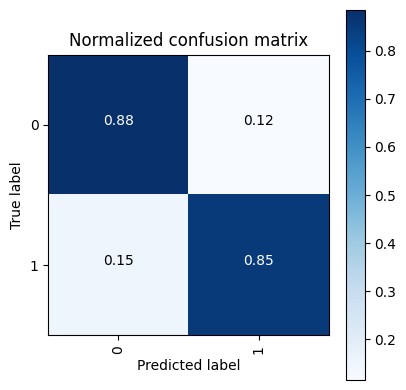

In [22]:
cnf_matrix = confusion_matrix(test_Y, pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(4, 4))
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, normalize=True, title='Normalized confusion matrix')

plt.show()

Una matrìz de confusión sirve para revisar que tan buena es una predicción. Las columnas (en este caso) representan los casos en que se predijo 0 y 1 respectivamente, mientras que las filas representan los casoso donde realmente es 0 y donde es 1 respectivamente. Los cuadrantes en blanco son los errores de la predicción. Los errores de tipo I o falsos positivos son cuando el modelo predice positivo pero realmente es negativo. Un error el tipo II es cuando el modelo predice negativo pero realmente es positivo. En este caso, es peor predecir que un hongo no es venenoso siendo que si lo era (error tipo II).


[Referencia](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

## Parte 4: Regresión Logística (15 Pts.)

### 4.1 Regresión Logística: Explicación teórica (4.5 pts)

Investiga sobre `Regresión Lógistica` y da una explicación con tus propias palabras de cómo funciona. Nuevamente no se espera una demostración matemática, el objetivo es que demuestres tu aprendizaje. Debes responder las siguientes preguntas:
1. ¿Qué es?
2. ¿Para qué sirve?
3. ¿Cómo funciona?
4. ¿Qué tipo de problemas resuelve?
5. ¿Cuáles son sus ventajas y desventajas?
6. ¿Qué es la función sigmoide?
7. ¿Qué son los pesos y el sesgo?
8. ¿Cuál es la diferencia entre la regresión logística y la regresión lineal?
9. ¿En qué situaciones es mejor utilizar regresión logística?

**:exclamation:IMPORTANTE:exclamation:** No utilices ChatGPT u otro modelo de lenguaje para responder esta pregunta. Será evaluado que cites al menos 1 recurso bibliográfico que hayas utilizado. Cualquier información que no tenga una referencia clara no se le dará puntaje.

--------------------

Regresión logística es un modelo estadístico que estima la probabilidad de un evento basandose en un dataset de variables independientes ($P(y|x)$). Usualmente suele usarse para la clasificación de variables binarias y análisis de predicción. Al igual que en perceptron, el modelo se basa en encontrar el vector peso $w$ y el sesgo $b$ correcto a través de ir auto-corrigiéndose. El vector $w$ cuantifa la importancia de cada una de las variables y $b$ es un parámetro para trasladar todo el producto. Se calcula el producto $p = w^\top x+b$ y para traspasar a probabilidad, se toma $p$ como argumento en la función sigmoide $\sigma (p)=\frac{1}{1+e^{-p}}$. Esta función tiene la propiedad de trabajar de forma similar a calcular probabilidades.

Regresión logística suele usarse cuando se necesita clasificar una información entre 2 clases, por ejemplo, determinar si un sentimiento de un escrito es positivo o negativo, o determinar si una imagen es un gato o un perro.

Unas ventajas son que entrega una certeza sobre una predicción (probabilidad), es fácil de implementar y eficiente, es escalable y una vez estrenado es rápido para hacer clasificaciones. Desventajas pueden ser que suele trabajar bien en datasets linelamente separables,  solo puede predecir funciones discretas y no entrega relaciones complejas dentro de las variables.

La mayor diferencia entre regresión lineal y logística, es que la logística retorna una predicción categórica (0 o 1) y la lineal entrega una predicción continua. Regresión logística suele usarse cuando se tiene una cantidad grande de datos, ya que entrega resultados con mayor significancia en este caso.

[Referencia](https://www.ibm.com/topics/logistic-regression)
[Referencia](https://web.stanford.edu/~jurafsky/slp3/5.pdf)
[Referencia](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/)

------------------------

### 4.2 Crear y Entrenar Regresión Logística (6 pts)

Crea y entrena un modelo de regresion logistica con los datos de entrenamiento, donde a traves del parametro `solver`, deberas elegir minimo 3 opciones diferentes de algoritmos de optimizacion, responder `cuales son sus principales diferencias` respecto a como actualizan los parametros del modelo y `dar una hipotesis` sobre cual crees que sera el algoritmo que funcione mejor para este dataset. Recuerda que la idea es que `justifiques tu respuesta`.

------------------

* Newton Cholesky: Se mueven usando aproximaciones cuadráticas (más rápidas que lineales).
* Liblinear: Se mueve optimizando una dimensión a la vez.
* Sag: Optimiza la suma de una cantidad finita de funciones convexas.

Bajo este marco y [referencia](https://medium.com/@arnavr/scikit-learn-solvers-explained-780a17bc322d) el mejor debería ser Newton CHolesky por sus aproximaciones a nivel cuadrático.

In [23]:
from sklearn.linear_model import LogisticRegression

clf_1 = LogisticRegression(solver='newton-cholesky')
clf_1.fit(train_X, train_Y)
print(f'Score Newton Cholesky: {clf_1.score(test_X, test_Y)}')

clf_2 = LogisticRegression(solver='liblinear')
clf_2.fit(train_X, train_Y)
print(f'Score liblinear: {clf_2.score(test_X, test_Y)}')

clf_3 = LogisticRegression(solver='sag')
clf_3.fit(train_X, train_Y)
print(f'Score sag: {clf_3.score(test_X, test_Y)}')

Score Newton Cholesky: 0.6365318774868141
Score liblinear: 0.6364393448690664
Score sag: 0.5786064587767188


c:\Users\Panorámica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* **

### 4.3 Evaluar Regresión Logística (2.5 pts)

Para cada uno de tus modelos anteriores (del punto 4.2), evalua el modelo con los datos de testing y calcula `accuracy`, `precision`, `recall` y `f1-score`. Puedes apoyarte de un reporte de clasificación. Comenta todos los resultados y explica qué significan.

In [24]:
pred = clf_1.predict(test_X)

accuracy = accuracy_score(test_Y, pred)
print("Accuracy:", accuracy)

precision = precision_score(test_Y, pred)
print("Precision:", precision)

recall = recall_score(test_Y, pred)
print("Recall:", recall)

f1 = f1_score(test_Y, pred)
print("F1-Score:", f1)

Accuracy: 0.6365318774868141
Precision: 0.6514452644526445
Recall: 0.7183791115632417
F1-Score: 0.6832768908240605


In [25]:
pred = clf_2.predict(test_X)

accuracy = accuracy_score(test_Y, pred)
print("Accuracy:", accuracy)

precision = precision_score(test_Y, pred)
print("Precision:", precision)

recall = recall_score(test_Y, pred)
print("Recall:", recall)

f1 = f1_score(test_Y, pred)
print("F1-Score:", f1)

Accuracy: 0.6364393448690664
Precision: 0.6512521124596712
Recall: 0.7187182095625636
F1-Score: 0.6833239300394939


In [26]:
pred = clf_3.predict(test_X)

accuracy = accuracy_score(test_Y, pred)
print("Accuracy:", accuracy)

precision = precision_score(test_Y, pred)
print("Precision:", precision)

recall = recall_score(test_Y, pred)
print("Recall:", recall)

f1 = f1_score(test_Y, pred)
print("F1-Score:", f1)

Accuracy: 0.5786064587767188
Precision: 0.5868441457741018
Recall: 0.7699220074601559
F1-Score: 0.666031094162511


En general, ninguno de los modelos es muy preciso ni certero con sus predicciones. Sin embargo,  newton-cholesky y liblinear tienen recall un poco más alto, por lo que se puede inferir que ambos podelos tienden a predecir más 1's que 0's. El f1-score no es muy bueno en ningún caso ya que la precisión de los modelos no es muy buena (f1 es sensible a valores pequeños).

------------------

### 4.4 Matriz de Confusión (2 pts)

De los modelos elegidos previamente, escoja el que mejor funcione y genere una `matriz de confusión` del modelo y responda la siguiente pregunta:

1. De los errores que puede cometer el modelo, ¿cuál es el más grave en este caso?

Normalized confusion matrix


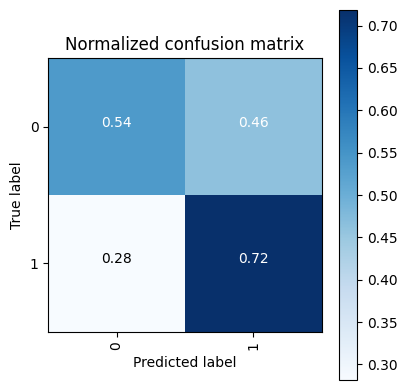

In [27]:
pred = clf_1.predict(test_X)

cnf_matrix = confusion_matrix(test_Y, pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(4, 4))
plot_confusion_matrix(cnf_matrix, classes=clf.classes_, normalize=True, title='Normalized confusion matrix')

plt.show()

El error más grave es predecir 0 cuando el valor real era 1, esto ocurre en un 28% de los hongos venenosos.

## Parte 5: Comparación de Modelos (10 Pts.)

1. ¿Cuáles son las ventajas y desventajas de utilizar redes bayesianas en comparación con modelos de regresión logística en el contexto del conjunto de datos Mushroom Dataset? Considera la capacidad de capturar relaciones probabilísticas complejas y la interpretabilidad de los resultados.

2. En base a los resultados, ¿qué modelo elegirías para clasificar los hongos entre la R? Justifica tu elección teniendo en cuenta las métricas de evaluación y la gravedad de los errores tipo I y tipo II.

Las redes bayesianas entregan mucha más información sobre la forma en que se relacionan las variables, ya que la regresión logística solo entrega una probabilidad sin mayor explicación (el modelo se optimiza hasta llegar a una buena solución, sin importar lo que sucede detrás). Sin embargo, regresión logística da un resultado mucho más rápido y en general es más fácil y automatizable que entregue predicciones.

Usaría MLP, ya que pese a que se demoró notablemente más, predijo de forma mucho más certera los resultados. Además, este modelo en general cometió menos errores tanto del tipo I como el tipo II, implicando que en este caso particular, mostró mejor desempeño.